In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import style
plt.style.use('bmh')
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
import matplotlib.colors as colors
import control
from IPython import display
from collections import deque
import pickle
from Utilities.ParticleFilter import *
from Utilities.Dynamics_Constraints_Controller import *
from Utilities.cida import CIDA
import random
from scipy.linalg import sqrtm

saveFigs = True
FigWidth = 2.5
FigHeight = 2.5

In [2]:
theta = -np.pi+0.01
np.arctan2(np.sin(theta), np.cos(theta))

-3.1315926535897933

In [3]:
x0 = np.random.randn(rx,1)
x0[0] = 10
x0[2] = -np.pi/2
Cov0 = 0.1 * np.diag(np.ones(rx,))
num_particles = 1000
Pred_Horizon_N = 10
number_of_simulations = 80
LangrangeMultp = 1000
cida =  CIDA(x0, Cov0, num_particles, stateDynamics, measurementDynamics, Q, R,
                 Pred_Horizon_N, Controller, number_of_simulations, CostAndConstraints, LangrangeMultp)
cida.initialize(x0, Cov0)

RandomSearch method returns the desired control input, according to CIDA


In [4]:
cida.RandomSearch()

array([3.14159265])

sampleAverage is an inherited method that returns the state conditional mean of the particle filter

In [5]:
cida.sampleAverage()

array([[ 9.97542298],
       [ 0.37618347],
       [-1.57300049]])

In [6]:
# A function to prepare the figure, its size, and plot the constraints set.

def Constraintsplot(ax):
    xc = np.linspace(-10,10,100)
    yc1 = np.sqrt(10**2-xc**2)
    yc2 = -np.sqrt(10**2-xc**2)
    ax.set_xlabel('$x\,\, (m)$', fontsize=9)
    ax.set_ylabel('$y\,\, (m)$', fontsize=9)
    ax.plot(xc,yc1,'r')
    ax.plot(xc,yc2,'r')
    ax.axis('equal')
    circle1 = plt.Circle((xs[0], ys[0]), rs[0], facecolor = 'blue')
    circle2 = plt.Circle((xs[1], ys[1]), rs[1], color='blue')
    circle3 = plt.Circle((xs[2], ys[2]), rs[2], color='blue')
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    pass

/var/folders/54/w5632h_d2qdffk_vmkbgn34m0000gn/T/ipykernel_32070/811942719.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


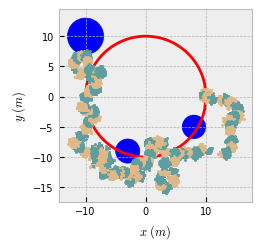

In [7]:
fig, ax= plt.subplots(figsize=(FigWidth,FigHeight))
Constraintsplot(ax)
T=100
cida.initialize(x0, Cov0)
x_true = cida.particles[:,random.sample(range(0, cida.num_particles), 1)]
AlphaAchieved_CE = np.zeros((T+1,))
#ax.set_xlim((-15,15))
#ax.set_ylim((-15,15))
for k in range(T):
    AlphaAchieved_CE[k] = cida.ViolationProb()
    uSharp = Controller(cida.sampleAverage())
    ax.plot(cida.particles[0,:],cida.particles[1,:],'o', markersize=1.1,color=list(colors.cnames)[k%2+12], zorder=2)
    y = measurementDynamics(x_true, uSharp) + sqrtm(R).real @ np.random.randn(ry, 1)
    cida.Apply_PF(uSharp, y)
    x_true = stateDynamics(x_true, uSharp, sqrtm(Q).real @ np.random.randn(rx,))

fig.savefig('Figures/CBF_and_CE.pdf',bbox_inches ="tight")

AlphaAchieved_CE[T]=cida.ViolationProb()   

fig.show()




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


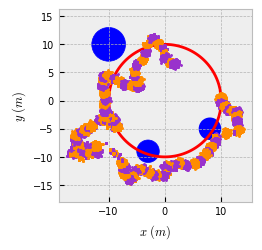

In [8]:
fig, ax= plt.subplots(figsize=(FigWidth,FigHeight))
Constraintsplot(ax)
cida.initialize(x0, Cov0)
x_true = cida.particles[:,random.sample(range(0, cida.num_particles), 1)]
AlphaAchieved_cida = np.zeros((T+1,))

for k in range(T):
    print(k)
    AlphaAchieved_cida[k] = cida.ViolationProb()
    uSharp = cida.RandomSearch()
    ax.plot(cida.particles[0,:],cida.particles[1,:],'o', markersize=1.1,color=list(colors.cnames)[k%2 +30], zorder=2)
    y = measurementDynamics(x_true, uSharp) + sqrtm(R).real @ np.random.randn(ry, 1)
    cida.Apply_PF(uSharp, y)
    x_true = stateDynamics(x_true, uSharp, sqrtm(Q).real @ np.random.randn(rx,))

plt.savefig('Figures/CBF_and_CIDAR.pdf',bbox_inches ="tight")

AlphaAchieved_cida[T]=cida.ViolationProb()   

plt.show()




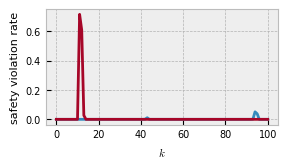

In [11]:
# Generating the violation rates figure
plt.style.use('bmh')
plt.figure(figsize=(3.0,1.5))
plt.plot(AlphaAchieved_CE)
plt.plot(AlphaAchieved_cida)
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels

plt.xlabel('$k$', fontsize=8)  
plt.ylabel('safety violation rate', fontsize=8) 
plt.savefig('Figures/violationRates.pdf',bbox_inches ="tight")

plt.show()